In [130]:
import pandas as pd 
import numpy as np 
import seaborn as sb

In [131]:
file = 'multi_asset_etf_data.xlsx' 
data = pd.read_excel(file, sheet_name = 'total returns').set_index('Date') 
data = data.drop(['SHV'], axis = 1)
data

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008993,-0.001000,0.155582,0.115190,0.138460,-0.027452,0.296151,0.230202,0.022882,0.099346,-0.017952
2009-05-31,0.053672,0.162663,0.159400,0.131918,0.028555,-0.020773,0.022727,0.053892,0.027865,0.058454,0.019967
2009-06-30,0.005149,-0.026259,-0.022495,-0.014050,0.033516,-0.005572,-0.024863,0.045449,-0.003436,-0.000655,0.001982
2009-07-31,0.031284,0.018568,0.110146,0.100415,0.069191,0.008317,0.105799,0.143247,0.015326,0.074606,0.000879
2009-08-31,0.007628,-0.040365,-0.013136,0.045031,-0.016969,0.007635,0.131939,0.033413,-0.004151,0.036939,0.008413
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.069696,0.056408,-0.061351,-0.067391,-0.041803,-0.042283,-0.041305,-0.125679,-0.033398,-0.087769,-0.021831
2022-05-31,0.005460,0.046131,0.006135,0.019959,0.016299,0.006184,-0.044434,0.015084,-0.004025,0.002257,-0.009922
2022-06-30,-0.046443,-0.075000,-0.051577,-0.087666,-0.070499,-0.008634,-0.068911,-0.132477,-0.033681,-0.082460,-0.031155


In [132]:
mean = (data.mean() * 12)
volatility = (data.std() * np.sqrt(12))
sharpe = (mean/volatility)
df = mean.to_frame('Mean') 
df['Volatility'] = volatility
df['Sharpe_Ratio'] = sharpe
print(df) 

         Mean  Volatility  Sharpe_Ratio
BWX  0.004653    0.078535      0.059248
DBC  0.038846    0.180186      0.215590
EEM  0.072621    0.191787      0.378655
EFA  0.081124    0.161885      0.501125
HYG  0.071588    0.089403      0.800730
IEF  0.025833    0.060077      0.429996
IYR  0.150128    0.184407      0.814113
PSP  0.133272    0.221299      0.602227
QAI  0.022862    0.048879      0.467723
SPY  0.150293    0.144811      1.037857
TIP  0.034967    0.047833      0.731032


In [133]:
df.nlargest(1, 'Sharpe_Ratio') 

,Mean,Volatility,Sharpe_Ratio
SPY,0.150293,0.144811,1.037857


In [134]:
df.nsmallest(1, 'Sharpe_Ratio') 

,Mean,Volatility,Sharpe_Ratio
BWX,0.004653,0.078535,0.059248


From the table, SPY has the best Sharpe Ratio and BWX has the worst Sharpe Ratio. 

<AxesSubplot:>

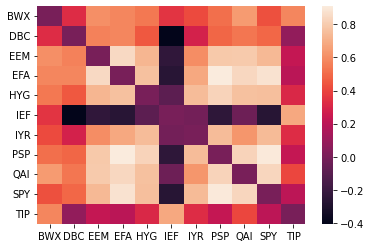

In [135]:
corr_matrix = data.corr()
corr_matrix[corr_matrix == 1] = 0
sb.heatmap(corr_matrix) 


In [136]:
corr_sorted = corr_matrix.unstack().sort_values().dropna() 
print(f'The highest correlation is {corr_sorted[-1]}')
print(f'The lowest correlation is {corr_sorted[0]}')

The highest correlation is 0.9087460438502873
The lowest correlation is -0.40543101061677644


In [137]:
df.loc[['TIP', 'IEF', 'BWX']] 

,Mean,Volatility,Sharpe_Ratio
TIP,0.034967,0.047833,0.731032
IEF,0.025833,0.060077,0.429996
BWX,0.004653,0.078535,0.059248


TIPS outperformed both domestic and foreign bonds with the highest return, lowest volatility and highest Sharpe Ratio. 

From the heatmap, we can notice that TIPS has low correlations related to other bonds, but notice that its relationship with domestic and foreign bonds is significant. 

In [138]:
def compute_tangency(df_tilde, diagonalize_Sigma=False): 

    Sigma = df_tilde.cov()

    # N is the number of assets

    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))


    mu_tilde = df_tilde.mean()

    Sigma_inv = np.linalg.inv(Sigma_adj)

    weights = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

    # For convenience, I'll wrap the solution back into a pandas.Series object.

    omega_tangency = pd.Series(weights, index=mu_tilde.index)

    return omega_tangency, mu_tilde, Sigma_adj



omega_tan, mean_tan, sigma_tan = compute_tangency(data)
omega_tan.to_frame('Tangency Weights') 

,Tangency Weights
BWX,-1.335168
DBC,0.239151
EEM,0.339786
EFA,-0.117068
HYG,1.070489
IEF,2.457952
IYR,-0.307783
PSP,-0.513078
QAI,-3.955222
SPY,2.430623


In [139]:
def port_cal(omega, mean, volatility, annual_fac):
    mean_port = omega @ mean * annual_fac
    volatility_port = np.sqrt(np.transpose(omega) @ volatility @ omega) * np.sqrt(annual_fac) 
    Sharpe_Ratio_port = mean_port/volatility_port 
    return pd.DataFrame(data = [mean_port, volatility_port, Sharpe_Ratio_port], 
                                index = ['Mean', 'Volatility', 'Sharpe Ratio'], 
                                columns = ['Portfolio Stats'])
port_cal(omega_tan, mean_tan, sigma_tan, 12)

,Portfolio Stats
Mean,0.342822
Volatility,0.175865
Sharpe Ratio,1.949342


In [140]:
def target_mv_portfolio(df_tilde, target_return=0.015, diagonalize_Sigma=False):
    
    """Compute MV optimal portfolio, given target return and set of excess returns.

    Parameters

    ----------

    diagonalize_Sigma: bool

        When `True`, set the off diagonal elements of the variance-covariance

        matrix to zero.

    """

    omega_tangency, mu_tilde, Sigma = compute_tangency(df_tilde, diagonalize_Sigma=diagonalize_Sigma)

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    Sigma_inv = np.linalg.inv(Sigma_adj)

    N = Sigma_adj.shape[0]

    delta_tilde = ((np.ones(N) @ Sigma_inv @ mu_tilde)/(mu_tilde @ Sigma_inv @ mu_tilde)) * target_return

    omega_star = delta_tilde * omega_tangency

    return omega_star, mu_tilde, Sigma_adj

omega_star, mu_tilde, sigma = target_mv_portfolio(data)

omega_star_df = omega_star.to_frame('MV Portfolio Weights')

omega_star_df

,MV Portfolio Weights
BWX,-0.701036
DBC,0.125567
EEM,0.178406
EFA,-0.061467
HYG,0.562065
IEF,1.290558
IYR,-0.161603
PSP,-0.269394
QAI,-2.076706
SPY,1.276209


In [147]:
initial = np.ones(df.shape[0]) 
target = 0.015 
weight_initial = initial/len(initial) 
weight = target * weight_initial / (data.mean() @ weight_initial)
port_cal(weight, mu_tilde, sigma, 12)

,Portfolio Stats
Mean,0.180000
Volatility,0.251661
Sharpe Ratio,0.715248


In [150]:
initial = np.ones(df.shape[0]) 
target = 0.015 
weight_initial = initial/data.std()
weight = target * weight_initial / (data.mean() @ weight_initial)
port_cal(weight, mu_tilde, sigma, 12)

,Portfolio Stats
Mean,0.180000
Volatility,0.235607
Sharpe Ratio,0.763983
